In [1]:
import mne
from mne.datasets import sample
from mne import io
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne.preprocessing import ICA
import numpy as np
from numpy import stack
import pandas as pd
import matplotlib.pyplot as plt
import os
import fnmatch



In [39]:
ROOT='/home/dcellier/RDSS/CMI_data/HBN/EEGdata/R1/EEG/NDARLC358CYJ/EEG/raw/csv_format/RestingState_data.csv'#'/home/dcellier/RDSS/CMI_data/HBN/EEGdata/R1/EEG/NDARCD401HGZ/EEG/raw/csv_format/RestingState_data.csv' #

In [ ]:
raw=pd.read_csv(ROOT,header=None,engine='python')

In [ ]:
#raw.values
raw.columns.name='times'

In [ ]:
raw.columns

In [ ]:
raw.index.name='channel'

In [ ]:
raw.index

In [ ]:
#raw=raw[0:1]
#raw

In [ ]:
#raw=raw[list(range(170000,170200))] #picking a random selection of time points in the middle of dataset
#raw=raw[0:10]

In [ ]:
import seaborn as sns


In [ ]:
## the seaborn example had this cumsum() func to try and show variation from the start. 
#raw2=raw.cumsum(axis=1).stack().reset_index(name='mV') 

In [ ]:
## this is without summing cumulatively, yields an absolute mV y-axis
raw2=raw.stack().reset_index(name='mV')
raw2

In [ ]:
g=sns.FacetGrid(raw2,col=u'channel',hue='channel',col_wrap=2,height=3.5)

g=g.map(plt.plot,'times','mV')
#plt.show()

In [ ]:
#g.map(plt.plot,'times','mV')

In [ ]:
def dateplot(x,y,**kwargs):
    ax=plt.gca()
    data=kwargs.pop('data')
    data.plot(x=x,y=y,ax=ax,grad=False,**kwargs)

In [ ]:
#g=g.map_dataframe(dateplot,'times','mV')

In [ ]:
tips=sns.load_dataset("tips")
g=sns.FacetGrid(tips,col='time',row='smoker')
g=g.map(plt.scatter,'sex',"total_bill")

In [ ]:
tips

In [289]:
import scipy.io as sio
a=sio.loadmat('/home/dcellier/RDSS/CMI_data/HBN/EEGdata/R3/EEG/NDARGG205WVN/EEG/raw/mat_format/RestingState.mat')

In [290]:
#raw=raw.values
#raw
raw=a['EEG'][0][0][15]
#a['EEG'][0][0][25][0]#[2][0][0]=='20  '
raw

array([[   -93.20669556,    -70.0546875 ,    -54.3594017 , ...,
         -6936.82177734,  -6944.88623047,  -8826.02734375],
       [   208.40077209,    233.77177429,    252.80747986, ...,
         -2118.66137695,  -2127.3215332 ,  -3699.56665039],
       [  -222.28215027,   -199.45480347,   -182.90766907, ...,
         -3485.05859375,  -3495.41625977,  -4877.32226562],
       ...,
       [  -960.26306152,   -930.30212402,   -903.45526123, ...,
         -9878.7265625 , -10341.85449219, -10249.53417969],
       [  6282.07519531,   6308.88330078,   6343.83789062, ...,
          1937.08959961,   1917.75891113,   1629.1348877 ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ]])

In [291]:
l=[]
for ev in a['EEG'][0][0][25][0]:
    l.append(ev[0][0])
#len(a['EEG'][0][0][25][0])

In [199]:
all_evs=a['EEG'][0][0][25][0]
first_ev=all_evs[2]
first_ev[1][0][0]


54150

In [292]:
l#=l[1:-1]

[u'break cnt',
 u'90  ',
 u'20  ',
 u'30  ',
 u'20  ',
 u'30  ',
 u'20  ',
 u'30  ',
 u'20  ',
 u'30  ',
 u'20  ',
 u'30  ',
 u'20  ',
 u'break cnt',
 u'91  ',
 u'31  ',
 u'11  ',
 u'21  ',
 u'16  ',
 u'26  ',
 u'14  ',
 u'24  ',
 u'12  ',
 u'22  ',
 u'17  ',
 u'27  ',
 u'13  ',
 u'23  ',
 u'18  ',
 u'28  ',
 u'15  ',
 u'25  ',
 u'12  ',
 u'22  ',
 u'17  ',
 u'27  ',
 u'32  ',
 u'11  ',
 u'21  ',
 u'16  ',
 u'26  ',
 u'14  ',
 u'24  ',
 u'12  ',
 u'22  ',
 u'17  ',
 u'27  ',
 u'13  ',
 u'23  ',
 u'18  ',
 u'28  ',
 u'15  ',
 u'25  ',
 u'12  ',
 u'22  ',
 u'17  ',
 u'27  ',
 u'33  ',
 u'11  ',
 u'21  ',
 u'16  ',
 u'26  ',
 u'14  ',
 u'24  ',
 u'12  ',
 u'22  ',
 u'17  ',
 u'27  ',
 u'13  ',
 u'23  ',
 u'18  ',
 u'28  ',
 u'15  ',
 u'25  ',
 u'12  ',
 u'22  ',
 u'17  ',
 u'27  ',
 u'break cnt']

In [168]:
b=l[1:]

In [169]:
c=b[:-1]

In [170]:
c

[u'90  ',
 u'20  ',
 u'30  ',
 u'20  ',
 u'30  ',
 u'20  ',
 u'30  ',
 u'20  ',
 u'30  ',
 u'20  ',
 u'30  ',
 u'20  ']

In [6]:
channels=mne.channels.read_montage(kind='GSN-HydroCel-129')
channel_pos=channels.pos[3:]
channel_names=channels.ch_names[3:]
channels=mne.channels.read_montage(kind='GSN-HydroCel-129',ch_names=channel_names)

In [7]:
#channels.pos
#ch_types=['eog','ecg','stim','eeg']
channels.pos.shape #[0:3]

(129, 3)

In [8]:
raw_info=mne.create_info(ch_names=channel_names,sfreq=500.0,montage=channels,ch_types='eeg')

In [9]:
raw.shape

(129, 206431)

In [10]:
thisRaw=mne.io.RawArray(raw,raw_info,first_samp=0,verbose=True)

Creating RawArray with float64 data, n_channels=129, n_times=206431
    Range : 0 ... 206430 =      0.000 ...   412.860 secs
Ready.


In [11]:
thisRaw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | E1, E2, E3, E4, E5, E6, E7, E8, E9, ...
    chs : list | 129 items (EEG: 129)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 132 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 129
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneT

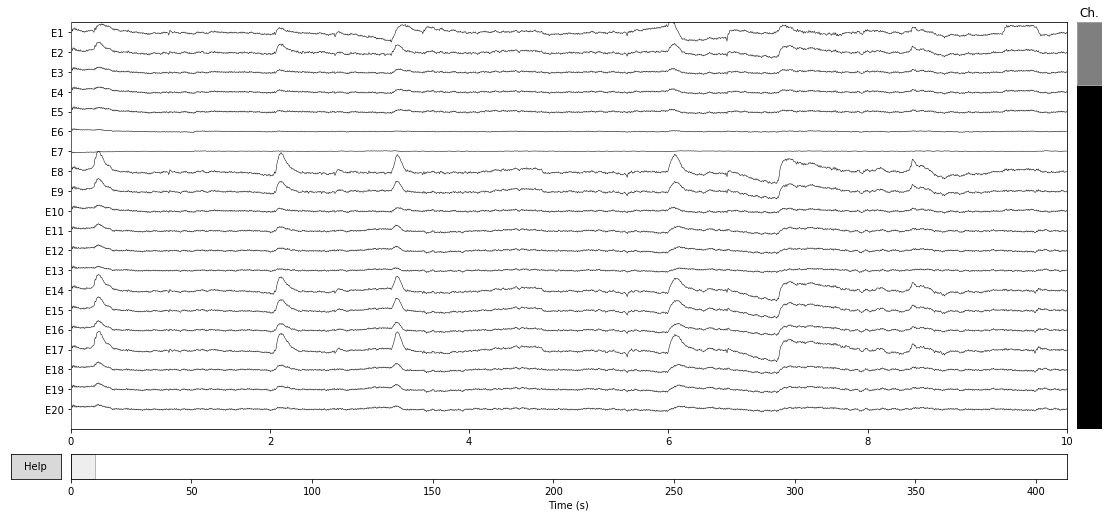

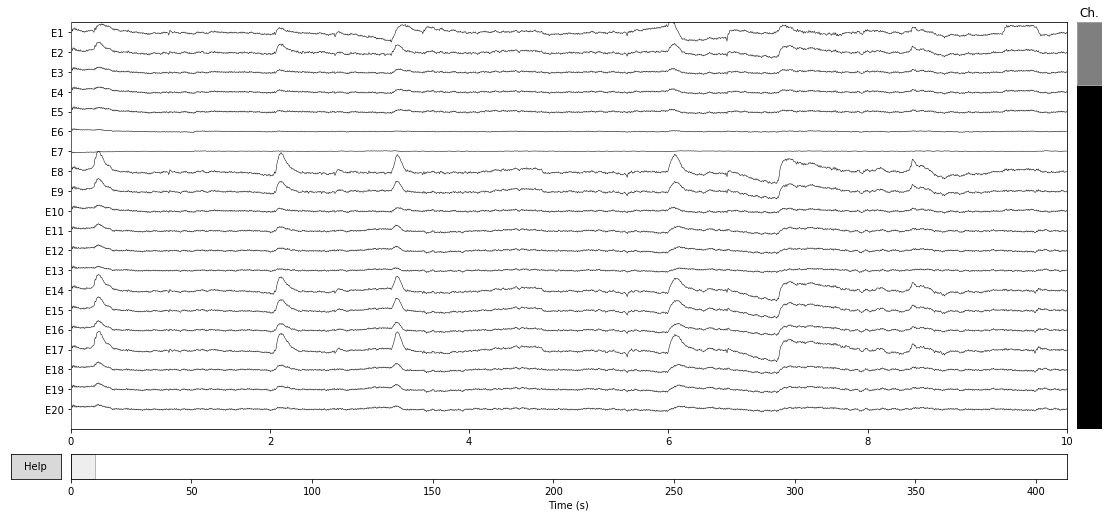

In [15]:
thisRaw.plot(scalings={'eeg':100})


In [ ]:
a.keys()

In [ ]:
len(a['EEG'][0][0][15])

In [ ]:
len(raw)

In [13]:
thisRaw.filter(1,50)

Setting up band-pass filter from 1 - 50 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 1651 samples (3.302 sec) selected


/data/backed_up/anaconda2/lib/python2.7/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


<RawArray  |  None, n_channels x n_times : 129 x 206431 (412.9 sec), ~203.5 MB, data loaded>

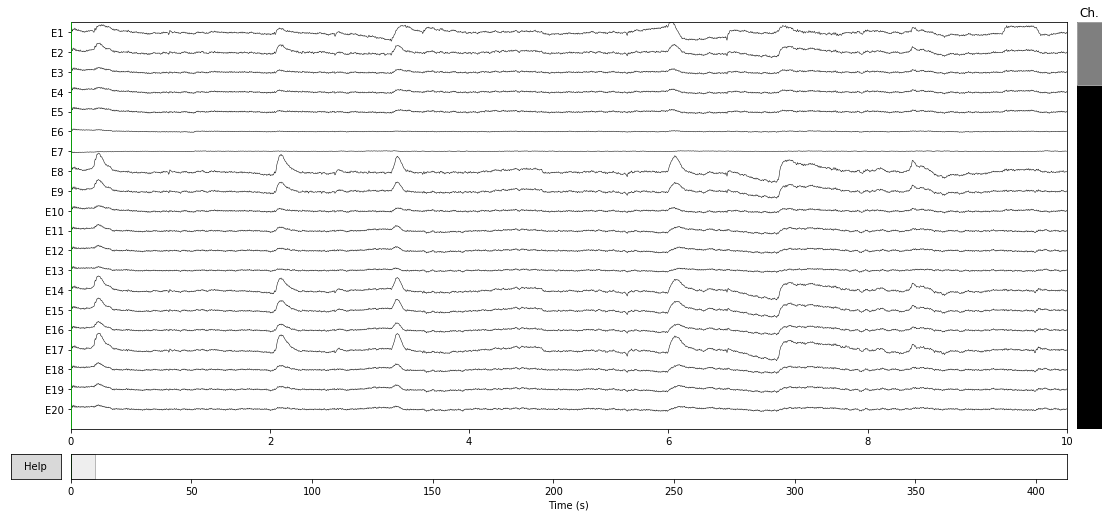

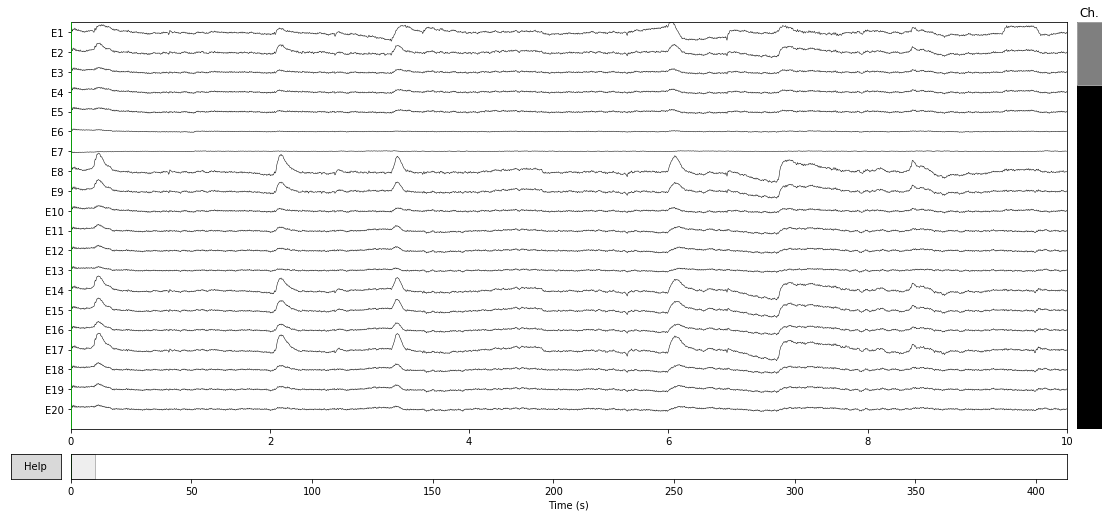

In [14]:
thisRaw.plot(scalings='auto')#{'eeg':100})

In [ ]:
print('a'+'a_%s_%s' %('w','t'))

In [ ]:
z={'a':[1,2],'b':[3,4]}
for i in z:
    print(i)

In [35]:
r5='/home/dcellier/RDSS/CMI_data/HBN/EEGdata/R5/EEG/'

In [36]:
for subject in os.listdir(r5):
    csv_path=r5+subject+'/EEG/raw/csv_format/RestingState_event.csv'
    if os.path.exists(csv_path):
        print('ok')
    else:
        print(subject)

NDARDH086ZKK
NDARGF543PM2
NDARLM196YRG
NDARLU111UYF
NDAREX065KJU
NDARDM118LR6
NDARMT882AWE
NDARDX872VH6
NDARZG690NHH
NDARLF446MT5


In [37]:
for subject in os.listdir(r5):
    mat_path=r5+subject+'/EEG/raw/mat_format/RestingState.mat'
    if os.path.exists(mat_path):
        print('ok')
    else:
        print(subject)

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


In [287]:
evs=pd.read_csv('/home/dcellier/RDSS/CMI_data/HBN/EEGdata/R3/EEG/NDARGG205WVN/EEG/raw/csv_format/RestingState_event.csv')

In [310]:
list(evs.type[evs.type=='break cnt'].index)

[0, 13, 78]

In [331]:
evs[0:13]

,type,sample,value,offset,duration,timestamp,orig
0,break cnt,1,epoch,NaN,205407,NaN,NaN
1,90,906,NaN,NaN,1,NaN,NaN
2,20,53133,NaN,NaN,1,NaN,NaN
3,30,63133,NaN,NaN,1,NaN,NaN
4,20,83133,NaN,NaN,1,NaN,NaN
5,30,93133,NaN,NaN,1,NaN,NaN
6,20,113129,NaN,NaN,1,NaN,NaN
7,30,123129,NaN,NaN,1,NaN,NaN
8,20,143129,NaN,NaN,1,NaN,NaN
9,30,153130,NaN,NaN,1,NaN,NaN


In [329]:
[i for i,e in enumerate(l) if e=='break cnt']#.count('break cnt')

[0, 13, 78]

In [157]:
evs['type'][0]=='break cnt'

True

In [158]:
evs2=evs[1:-1]

In [163]:
evs2=evs[1:]
evs3=evs2[:-1]

In [164]:
evs2

,type,sample,value,offset,duration,timestamp,orig
1,90,4664,NaN,NaN,1,NaN,NaN
2,20,54150,NaN,NaN,1,NaN,NaN
3,30,64151,NaN,NaN,1,NaN,NaN
4,20,84149,NaN,NaN,1,NaN,NaN
5,30,94149,NaN,NaN,1,NaN,NaN
6,20,114149,NaN,NaN,1,NaN,NaN
7,30,124149,NaN,NaN,1,NaN,NaN
8,20,144148,NaN,NaN,1,NaN,NaN
9,30,154148,NaN,NaN,1,NaN,NaN
10,20,174148,NaN,NaN,1,NaN,NaN


In [282]:
evs3['type'][11]

'20  '

In [245]:
evs.reset_index(drop=True)
evs['type'][3].split()[0]#==c[2]

'30'

In [217]:
c

[u'90  ',
 u'20  ',
 u'30  ',
 u'20  ',
 u'30  ',
 u'20  ',
 u'30  ',
 u'20  ',
 u'30  ',
 u'20  ',
 u'30  ',
 u'20  ']

In [ ]:
NDARHP924ZHW 

In [332]:
x=sio.loadmat('/home/dcellier/RDSS/CMI_data/HBN/EEGdata/R3/EEG/NDARHP924ZHW/EEG/raw/mat_format/RestingState.mat')

In [341]:
e_arrr=x['EEG'][0][0][25][0]

In [346]:
for e in e_arrr:
    print(e[0])
    print(e[1])

[u'break cnt']
[[1]]
[u'90  ']
[[929]]
[u'20  ']
[[20054]]
[u'30  ']
[[30055]]
[u'20  ']
[[50054]]
[u'30  ']
[[60054]]
[u'20  ']
[[80050]]
[u'30  ']
[[90050]]
[u'20  ']
[[110050]]
[u'30  ']
[[120051]]
[u'20  ']
[[140051]]
[u'30  ']
[[150051]]
[u'20  ']
[[170052]]
[u'break cnt']
[[172332]]


In [347]:
v=[1,2,3]
g=['one','two','three']
v=zip(v,g)

In [348]:
v

[(1, 'one'), (2, 'two'), (3, 'three')]

In [349]:
for e,i in v:
    print e
    print i

1
one
2
two
3
three


In [355]:
for a in thisRaw.info['chs'][0]:
    print(a)

loc
ch_name
unit_mul
kind
coord_frame
logno
cal
coil_type
range
scanno
unit


In [402]:
done=mne.read_epochs('/data/backed_up/shared/CMI_data/MIPDB/preproc/A00059578/A00059578_eyes_open_epoch_4-epo.fif')

Reading /data/backed_up/shared/CMI_data/MIPDB/preproc/A00059578/A00059578_eyes_open_epoch_4-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
7 matching events found
Applying baseline correction (mode: mean)
7 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [403]:
done.events

array([[183519,      0,     24],
       [184519,      0,     24],
       [185519,      0,     24],
       [186519,      0,     24],
       [187519,      0,     24],
       [188519,      0,     24],
       [189519,      0,     24]])

In [396]:
evs_cop=done.events.copy()


In [397]:
#evs_cop=list(evs_cop).append([4, 0, 22])#.append([5,0,22])#,[3,0,31],[4,0,31])

In [398]:
evs_cop

array([[39972,     0,    30],
       [40972,     0,    30],
       [42972,     0,    30],
       [43972,     0,    30],
       [44972,     0,    30],
       [45972,     0,    30],
       [46972,     0,    30],
       [47972,     0,    30],
       [48972,     0,    30],
       [49972,     0,    30],
       [50972,     0,    30],
       [51972,     0,    30],
       [52972,     0,    30],
       [54972,     0,    30],
       [55972,     0,    30],
       [56972,     0,    30]])

In [399]:
j=[i[0] for i in evs_cop if i[2]==30]
j[0]

39972

In [375]:
for f in evs_cop:
    print(f)

[39972     0    30]
[40972     0    30]
[42972     0    30]
[43972     0    30]
[44972     0    30]
[45972     0    30]
[46972     0    30]
[47972     0    30]
[48972     0    30]
[49972     0    30]
[50972     0    30]
[51972     0    30]
[52972     0    30]
[54972     0    30]
[55972     0    30]
[56972     0    30]
